In [1]:
import numpy as np
import pandas as pd

This is a template for your final project. 

In [2]:
full_dataset = pd.read_csv('IMDb movies.csv')
full_dataset.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0


### Part 1.

Task formalization and Evaluation criteria

1.1 Select your target variable, explain your choice. Separate target variable from the feature matrix.

I select as target variable "avg_votes".
See reasoning below.

#### What is success?
Intuitively I would say, that ideally the target variable should be the worldwide_gross_income. The gross income can be classified equally as success.
#### What are the problems with world_wide_gross_income?
- The date range is too big, the currency valuation is very unstable and noisy through the whole period, so that worldwide_gross_income cannot be taken (Obvious)
- There are too many missing values in worldwide_gross_income. (appr. 70%), so that alone this fact makes it not usable as a target variable (See cell below)

We have to reject worldwide_gross_income as a good target measure.

<AxesSubplot:title={'center':'Missing data (%)'}>

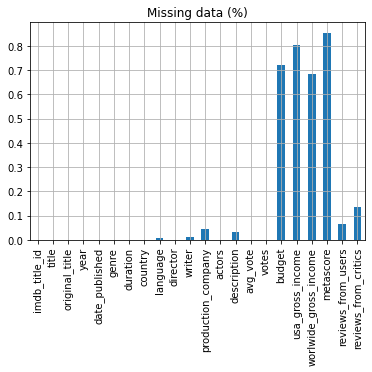

In [3]:
num_rows = full_dataset.shape[0]
(full_dataset.isna().sum() / num_rows).plot(kind="bar", title="Missing data (%)", grid=True)

### What alternative targets exist?
- Number of Votes and Avg_votes seem to be another good quantitative measure of success. Number of votes represents the popularity of a movie (therefore many people vote), while Avg_votes repesents the quality of a movie. One would expect that this goes hand in hand and is strongly correlated.
- Which one is better? By observing some samples of data, it seems that the early year movies generally don't have much votes. Moreover the movies of countries outside of USA & Europe seem to have generally fewer votes.
- We see a correlation, but because of the mentioned reasons, the number of votes seems to be biased by year and country. If this biased would be removed an even stronger correlation could be expected.
- "avg_votes" has a nice distribution, which approixmates a Gaussian normal distribution. This improves the quality of prediction.

### Conclusion:
I select as target variable "avg_votes".

<AxesSubplot:title={'center':'avg_vote vs votes'}, xlabel='avg_vote', ylabel='votes'>

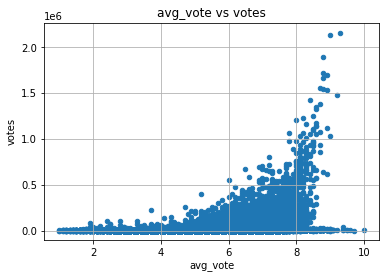

In [4]:
pd.concat([full_dataset['avg_vote'], full_dataset['votes']], axis=1).plot.scatter(x='avg_vote', y='votes', title='avg_vote vs votes', grid=True)

In [5]:
partial_dataset = pd.concat([full_dataset['avg_vote'], full_dataset['votes'],full_dataset['year'],full_dataset['country']], axis=1)

partial_dataset[(partial_dataset['avg_vote']>8)&(partial_dataset['votes']<200000)]

,avg_vote,votes,year,country
155,8.1,51644,1920,Germany
238,8.3,101619,1921,USA
239,8.1,9322,1921,Sweden
320,8.1,16798,1923,USA
357,8.1,11361,1924,Germany
...,...,...,...,...
59934,8.4,1206,2010,USA
60017,8.1,53242,2012,India
60031,8.1,3712,2011,India
60081,8.2,3815,2011,Egypt


<AxesSubplot:title={'center':'avg_vote'}, ylabel='Frequency'>

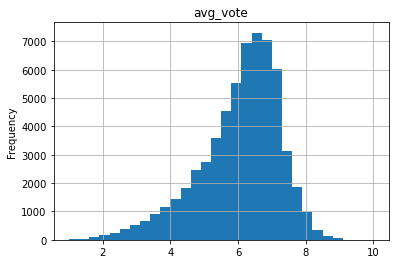

In [6]:
full_dataset['avg_vote'].plot.hist(bins=30, grid=True, title="avg_vote")

In [7]:
# Seperating target variable from the feature matrix.
full_dataset.rename({'avg_vote': 'target'}, axis=1)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,target,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60193,tt1836907,Sài Gòn Yo!,Sài Gòn Yo!,2011,2011-04-22,Drama,106,Vietnam,Vietnamese,Stephane Gauger,...,"Quynh Hoa, Khuong Ngoc, Elly Nguyen, Phan Tan ...","Mai, a ribbon dancer from the countryside arri...",6.8,106,$ 500000,NaN,NaN,NaN,3.0,4.0
60194,tt1836912,Shaitan,Shaitan,2011,2011-06-10,"Action, Crime, Drama",121,India,"Hindi, English",Bejoy Nambiar,...,"Kalki Koechlin, Shiv Panditt, Gulshan Devaiah,...",Five substance-abusing friends decide to fake ...,7.2,7615,NaN,NaN,NaN,NaN,42.0,15.0
60195,tt1836918,Slow Action,Slow Action,2011,2011-01-28,Sci-Fi,45,UK,English,Ben Rivers,...,NaN,NaN,6.8,107,GBP 30000,NaN,NaN,NaN,4.0,6.0
60196,tt1836926,Stealing Las Vegas,Stealing Las Vegas,2012,2012-09-11,"Crime, Thriller",87,USA,English,Francisco Menéndez,...,"Eric Roberts, Antonio Fargas, Ethan Landry, An...",When a greedy Las Vegas casino owner threatens...,3.9,354,NaN,NaN,NaN,NaN,10.0,4.0


1.2 Explain which task are you going to solve (is it a regression, classification or something else)? 

- I think the nature of the question is "binary", either True or False. Therefore it is a classification task.
- Moreover, we have a target variable avg_vote, therefore it is supervised.

See below the preparation of the target variable to be either 1 = successful or 0 = not successful. The question is; what is the best threshold of either 0 and 1.

Success Threshhold : 6.8


<AxesSubplot:title={'center':'avg_vote'}, ylabel='Frequency'>

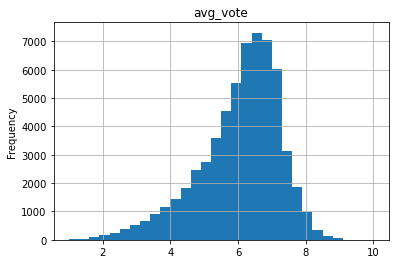

In [8]:
# Defining success threshold
# When observing the target dsitribution, a quantile of 0.75 makes absolutely sense,
# it is where, the marjority of movies are rated, but cuts off the lower and longer end of "unsuccessful movies".
success_threshold = full_dataset['avg_vote'].quantile(0.75)
print(f"Success Threshhold : {success_threshold}")
full_dataset['avg_vote'].plot.hist(bins=30, grid=True, title="avg_vote")


In [9]:
#Formatting the target variable
full_dataset['target'] = full_dataset['avg_vote'].apply(lambda x: 1 if x >= success_threshold else 0)

#Target distribution (absolute)
print(f"Target distribution (absolute):\n{full_dataset['target'].value_counts()}")

#Target distribution (relative)
print(f"Target distribution (relative):\n{full_dataset['target'].value_counts()/full_dataset['target'].shape[0]}")

# One would expect that 0.75 Quantile is exactly explit 75% - 25%. However, there is a deviation by the low granularity of ratings,
# which only measure avg_votes rounded to 1 decimal position.


Target distribution (absolute):
0    43013
1    17185
Name: target, dtype: int64
Target distribution (relative):
0    0.714525
1    0.285475
Name: target, dtype: float64


1.3 Select a metric. Is it already implemented in sklearn? If yes, import it. If not, it is time to write a function which will calculate it. 

- The F1 score is the harmonic mean of the precision and recall
- It is a measure of accuracy; exactly what we want.
- The greater the F1-Score, the better is the performance of our model
- Best value at 1 and worst score at 0
- Formula F1-Score -> F1 = 2 * (precision * recall) / (precision + recall)
- In sklearn.metrics f1_score is already in-built

In [10]:
from sklearn.metrics import f1_score

### Part 2.

Explore and preprocess the data

2.1 Split data into train and test

In [11]:
from sklearn.model_selection import train_test_split

# Splitting between 0.4-0.2 in test seems approriate. I chose the lower bound of test sets
train, test = train_test_split(full_dataset, test_size=0.2, random_state=42) #Choosing a random state, that test results can be compared & reproduced
X_train, y_train, X_test, y_test = train.drop(['target'], axis=1), train.target, test.drop(['target'], axis=1), test.target # Splitting


2.2 Explore you data: make plots, print tables. Make sure to write your observations.  Do not forget to fill-in missing values, define relevant columns transformatios. 


In [12]:
full_dataset.dtypes #Datset Types Overview, what is numeric, what is a String

imdb_title_id             object
title                     object
original_title            object
year                       int64
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
target                     int64
dtype: object

In [13]:
full_dataset.isna().sum() # How many missing values?

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                      5
language                   439
director                    24
writer                     808
production_company        2744
actors                      30
description               1993
avg_vote                     0
votes                        0
budget                   43379
usa_gross_income         48306
worlwide_gross_income    41062
metascore                51386
reviews_from_users        4069
reviews_from_critics      8229
target                       0
dtype: int64

#### imdb_title_id
imdb_title_id is simply a sequential id, every id is unique.
It has to be dropped.

In [14]:
# imdb_title_id
print(full_dataset.imdb_title_id.describe())
full_dataset.drop(['imdb_title_id'], axis=1, inplace=True)

count         60198
unique        60198
top       tt1126618
freq              1
Name: imdb_title_id, dtype: object


#### title

There is no quantitative value in title, there are 57'284 uniqze values out of 60'198.
It has to be dropped.

In [15]:
print(full_dataset.title.describe())
full_dataset.drop(['title'], axis=1, inplace=True)

count                    60198
unique                   57284
top       The Three Musketeers
freq                         8
Name: title, dtype: object


#### original title
This is the same/equivalent to title. It has to be dropped.

In [16]:
print(full_dataset.original_title.describe())
full_dataset.drop(['original_title'], axis=1, inplace=True)

count                    60198
unique                   57290
top       The Three Musketeers
freq                         8
Name: original_title, dtype: object


#### year
- We see that the correlation between the number of movies and successful movies is not linear.
- The year is an important feature to identify the success; there is kind of a nonlinear relationship.

AxesSubplot(0.125,0.125;0.775x0.755)


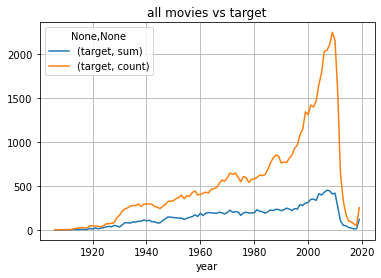

In [17]:
print(full_dataset[['target', 'year']].groupby(['year']).agg(['sum', 'count']).plot.line(grid=True, title="all movies vs target"))


#### date_published
The only value of date_published could be if it during a weekend or workday or a special quarter. Below there is seen the investigation by season. There is a strong correlation between not successful and successful values, so that there is no additional value.
I drop the feature.

AxesSubplot(0.125,0.125;0.775x0.755)


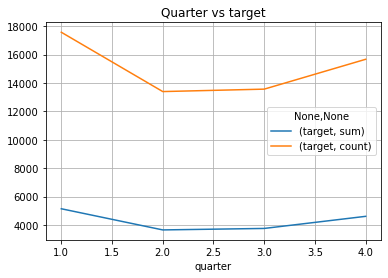

In [18]:
full_dataset['quarter'] = pd.to_datetime(full_dataset['date_published']).apply(lambda x: x.quarter)

print(full_dataset[['target', 'quarter']].groupby(['quarter']).agg(['sum', 'count']).plot.line(grid=True, title="Quarter vs target"))

full_dataset.drop(['date_published','quarter'], axis=1, inplace=True)

imdb_title_id is simply a sequential id, every id is unique, 

#### genre


In [19]:
print(full_dataset["genre"].value_counts())

Drama                         8498
Comedy                        5420
Comedy, Drama                 2654
Drama, Romance                2529
Comedy, Romance               1777
                              ... 
Action, Thriller, Sci-Fi         1
Crime, Romance, Sci-Fi           1
Comedy, Film-Noir, Mystery       1
Drama, Mystery, Sport            1
Animation, Comedy, Western       1
Name: genre, Length: 1202, dtype: int64


- We see that there is a general problem, that there are more than one category.
- Potentially we could split all genres, if more than one. But this would give a bias between one-category-genres and many-categories genres.
- I assume that the first genre is always the main genre, therefore let's only keep the main genre.

In [20]:
full_dataset["genre"] = full_dataset["genre"].str.split(', ').apply(lambda main_genre: main_genre[0])

print(full_dataset["genre"])

genre_vals = full_dataset[['target', 'genre']].groupby(['genre']).agg(['sum', 'count'])

print(pd.concat([genre_vals.target["sum"], genre_vals.target["count"],genre_vals.target["sum"]/genre_vals.target["count"]], axis=1))



0        Biography
1            Drama
2            Drama
3        Adventure
4        Biography
           ...    
60193        Drama
60194       Action
60195       Sci-Fi
60196        Crime
60197       Action
Name: genre, Length: 60198, dtype: object
              sum  count         0
genre                             
Action       1670   8360  0.199761
Adult           0      2  0.000000
Adventure     712   2797  0.254558
Animation     603   1284  0.469626
Biography     698   1400  0.498571
Comedy       4466  17350  0.257406
Crime        1370   4228  0.324030
Documentary     2      2  1.000000
Drama        6809  17565  0.387646
Family         88    453  0.194260
Fantasy        64    342  0.187135
Film-Noir      13     34  0.382353
History        17     52  0.326923
Horror        158   3215  0.049145
Music          18     54  0.333333
Musical        79    293  0.269625
Mystery        71    426  0.166667
Romance       127    531  0.239171
Sci-Fi         21    302  0.069536
Sport         

- We see that there are some very small categories, however they don't disturb since the category number is not that big
- Otherwise the genre data look very promising; there is a lot of success cariance between the categories, which
will allow a strong categorical feature

In [21]:
genre_vals = full_dataset[['target', 'genre']].groupby(['genre']).agg(['sum', 'count'])

print(pd.concat([genre_vals.target["sum"], genre_vals.target["count"],genre_vals.target["sum"]/genre_vals.target["count"]], axis=1))


              sum  count         0
genre                             
Action       1670   8360  0.199761
Adult           0      2  0.000000
Adventure     712   2797  0.254558
Animation     603   1284  0.469626
Biography     698   1400  0.498571
Comedy       4466  17350  0.257406
Crime        1370   4228  0.324030
Documentary     2      2  1.000000
Drama        6809  17565  0.387646
Family         88    453  0.194260
Fantasy        64    342  0.187135
Film-Noir      13     34  0.382353
History        17     52  0.326923
Horror        158   3215  0.049145
Music          18     54  0.333333
Musical        79    293  0.269625
Mystery        71    426  0.166667
Romance       127    531  0.239171
Sci-Fi         21    302  0.069536
Sport           1      4  0.250000
Thriller       81    811  0.099877
War            34     93  0.365591
Western        83    600  0.138333


#### duration
- We see generally longer films are more successful, there is a difference, therefore it is a valid feature.

<AxesSubplot:title={'center':'duration vs target'}, xlabel='duration', ylabel='target'>

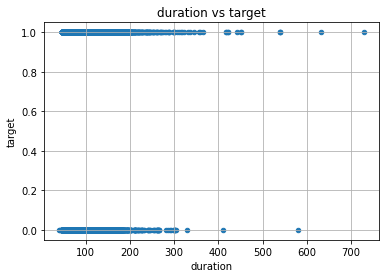

In [22]:
pd.concat([full_dataset['target'], full_dataset['duration']], axis=1).plot.scatter(x='duration', y='target', title='duration vs target', grid=True)

#### country

- Only first country is chosen, assuming this to be the main country
- The success rates by country are very diverse, that will be good for a strong feature.
- I don't want to have a prediction of countries, which do have less than 2 movies (Not representative)

In [23]:
full_dataset['country'].value_counts()

full_dataset['country'] = full_dataset['country'].str.split(', ').apply(lambda main_country: main_country[0] if main_country is not np.nan else "missing_value")

print(full_dataset['country'].value_counts())

country_vals = full_dataset[['target', 'country']].groupby(['country']).agg(['sum', 'count'])

country_vals_other = country_vals.target[(country_vals.target["count"]>2)]

country_vals_other = set(country_vals_other["count"].index.tolist())

full_dataset['country'] = full_dataset['country'].apply(lambda ctry: "Other" if ctry not in country_vals_other else ctry)

print(full_dataset['country'].value_counts())

country_vals = full_dataset[['target', 'country']].groupby(['country']).agg(['sum', 'count'])

print(pd.concat([country_vals.target["sum"], country_vals.target["count"],country_vals.target["sum"]/country_vals.target["count"]], axis=1))

USA         23832
UK           4365
France       3910
India        3102
Italy        3012
            ...  
Kenya           1
Moldova         1
Suriname        1
Belarus         1
Zambia          1
Name: country, Length: 140, dtype: int64
USA              23832
UK                4365
France            3910
India             3102
Italy             3012
                 ...  
Greenland            3
Liechtenstein        3
Panama               3
Nepal                3
Guatemala            3
Name: country, Length: 110, dtype: int64
               sum  count         0
country                            
Afghanistan      3      3  1.000000
Albania          5      9  0.555556
Algeria          5     10  0.500000
Angola           1      4  0.250000
Argentina      149    407  0.366093
...            ...    ...       ...
Venezuela        8     21  0.380952
Vietnam         12     17  0.705882
West Germany   161    583  0.276158
Yugoslavia     211    288  0.732639
missing_value    1      5  0.200000

#### director
- There are many different unique directors, however they are very divcerse and make a strong feature
- There are a lot of difference between a successful and a not successful director.
- I only take the first Director as main director
- In a previous version I had tested it with category "Other" and OneHotEncoding. The outcome was quite poor.
- I put together the average success rate of every director in one single column,. By doing this I get a very good result

In [24]:
feature = "director"

full_dataset[feature] = full_dataset[feature].str.split(', ').apply(lambda value: value[0] if value is not np.nan else "missing_value")

values = full_dataset[['target', feature]].groupby([feature]).agg(['sum', 'count'])
success_rate = values.target["sum"]/values.target["count"]
full_dataset[feature] = full_dataset[feature].apply(lambda row: success_rate.loc[row] if row in success_rate.index else 0)

print(success_rate)

director
'Evil' Ted Smith              0.000000
'Philthy' Phil Phillips       0.000000
A. Bhimsingh                  0.875000
A. Dean Bell                  0.000000
A. Edward Sutherland          0.217391
                                ...   
Ümit Elçi                     0.000000
Ümit Ünal                     0.200000
Þorsteinn Gunnar Bjarnason    0.000000
Þráinn Bertelsson             0.750000
Þórhildur Þorleifsdóttir      1.000000
Length: 21052, dtype: float64


#### language
- There are quite some different language, which success rate on tgarget ist quite different.
- In a previous version I had tested it with category "Other" and OneHotEncoding. The outcome was quite poor.
- I put together the average success rate of every director in one single column. By doing this I get a very good result

In [25]:
feature = "language"

full_dataset[feature] = full_dataset[feature].str.split(', ').apply(lambda value: value[0] if value is not np.nan else "missing_value")

values = full_dataset[['target', feature]].groupby([feature]).agg(['sum', 'count'])
success_rate = values.target["sum"]/values.target["count"]
full_dataset[feature] = full_dataset[feature].apply(lambda row: success_rate.loc[row] if row in success_rate.index else 0)

print(success_rate)

language
Aboriginal                0.666667
Afrikaans                 0.727273
Akan                      1.000000
Albanian                  0.555556
American Sign Language    0.000000
                            ...   
Xhosa                     0.000000
Yiddish                   0.400000
Yoruba                    1.000000
Zulu                      0.666667
missing_value             0.318907
Length: 145, dtype: float64


#### Writer
- Too many uniue values, writer is not the director, and a director doesn't always choose the same writers, therefore a disturbing feature.
- I will drop this feature

In [26]:
print(full_dataset['writer'].value_counts())
print(full_dataset['writer'].describe())

full_dataset.drop(['writer'], axis=1, inplace=True)

Jing Wong                                70
Kuang Ni                                 44
Woody Allen                              33
Cheh Chang, Kuang Ni                     32
Leonardo Benvenuti, Piero De Bernardi    32
                                         ..
Hideo Oguni, Ryûzô Kikushima              1
Manoj Mitra, Tapan Sinha                  1
Christopher Folino                        1
Rob Lieber, Rob Lieber                    1
Georgiy Grebner, Karel Capek              1
Name: writer, Length: 47546, dtype: int64
count         59390
unique        47546
top       Jing Wong
freq             70
Name: writer, dtype: object


#### production_company

- There are many different production companies, who do have a big impact on success ratge.
- In a previous version I had tested it with category "Other" and OneHotEncoding. The outcome was quite poor.
- I put together the average success rate of every director in one single column. By doing this I get a very good result

In [27]:
feature = "production_company"

full_dataset[feature] = full_dataset[feature].str.split(', ').apply(lambda value: value[0] if value is not np.nan else "missing_value")

values = full_dataset[['target', feature]].groupby([feature]).agg(['sum', 'count'])
success_rate = values.target["sum"]/values.target["count"]
full_dataset[feature] = full_dataset[feature].apply(lambda row: success_rate.loc[row] if row in success_rate.index else 0)


print(success_rate)

production_company
"DIA" Productions GmbH & Co. KG    0.000000
"DumBeast" Partners                0.000000
"G" P.C. S.A.                      0.000000
"Mi" Production Studio             0.000000
"Ulitka" Studio                    0.000000
                                     ...   
Österreichisches Filminstitut      0.000000
Özen Film                          0.500000
Özer Film                          0.000000
Új Budapest Filmstudió             0.333333
Új Dialóg Stúdió                   0.000000
Length: 21437, dtype: float64


#### actors

- The actors feature is very extensive and we need to simply it, by only taking the firt actor (main actor). Surely there are more than 1 main actor, but the first one is the most important.
- In a previous version I had tested it with category "Other" and OneHotEncoding. The outcome was quite poor.
- I put together the average success rate of every director in one single column,. By doing this I get a very good result

In [28]:
feature = "actors"

full_dataset[feature] = full_dataset[feature].str.split(', ').apply(lambda value: value[0] if value is not np.nan else "missing_value")

values = full_dataset[['target', feature]].groupby([feature]).agg(['sum', 'count'])
success_rate = values.target["sum"]/values.target["count"]
full_dataset[feature] = full_dataset[feature].apply(lambda row: success_rate.loc[row] if row in success_rate.index else 0)

print(success_rate)

actors
'Lee' George Quinones     1.0
'Weird Al' Yankovic       1.0
2Mex                      0.0
50 Cent                   0.0
A Martinez                1.0
                         ... 
Ümit Acar                 0.0
Ümit Kantarcilar          0.0
Þröstur Leó Gunnarsson    0.0
Þórhallur Sigurðsson      0.0
Þórhallur Sverrisson      1.0
Length: 25082, dtype: float64


#### description
- Description is a custom text, all values are quite unique. One can think to extract words count the words, but this would be an overkill for this final project and the success is not guaranteed.
- The feature has to be dropped

In [29]:
print(full_dataset['description'])
print(full_dataset['description'].describe())

full_dataset.drop(['description'], axis=1, inplace=True)


0        True story of notorious Australian outlaw Ned ...
1        Two men of high rank are both wooing the beaut...
2        The fabled queen of Egypt's affair with Roman ...
3        Loosely adapted from Dante's Divine Comedy and...
4        An account of the life of Jesus Christ, based ...
                               ...                        
60193    Mai, a ribbon dancer from the countryside arri...
60194    Five substance-abusing friends decide to fake ...
60195                                                  NaN
60196    When a greedy Las Vegas casino owner threatens...
60197    When three redneck brothers agree to help a wo...
Name: description, Length: 60198, dtype: object
count     58205
unique    58126
top        Mail
freq          7
Name: description, dtype: object


#### Columns with too many missing values have to be dropped
- budget, usa_gross_income, worldwide_gross_income, metascore have too many missing values, all over 65%, therefore it is not representative and has to be dropped

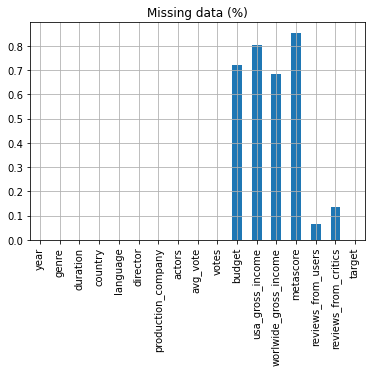

In [30]:
(full_dataset.isna().sum() / num_rows).plot(kind="bar", title="Missing data (%)", grid=True)

full_dataset.drop(['budget','usa_gross_income','worlwide_gross_income','metascore'], axis=1, inplace=True)


#### reviews_from_users
- The number of reviews is not randomly distributed to successful & not successful movies. There is a tendency that sucessful movies get more reviews.
- The feature is useful, no transformation required
- NA values ares filled by 0

AxesSubplot(0.125,0.125;0.775x0.755)


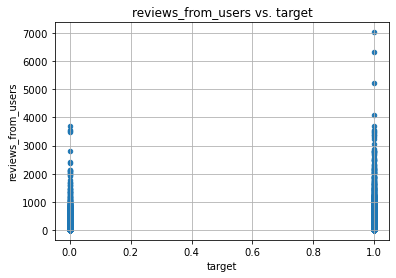

In [31]:
print(pd.concat([full_dataset['reviews_from_users'], full_dataset['target']], axis=1).plot.scatter(x='target', y='reviews_from_users', title='reviews_from_users vs. target', grid=True))

full_dataset['reviews_from_users'] = full_dataset['reviews_from_users'].fillna(0)

#### reviews_from_critics
- The number of reviews is not randomly distributed to successful & not successful movies. There is a tendency that sucessful movies get more reviews.
- The feature is useful, no transformation required
- NA values ares filled by 0

AxesSubplot(0.125,0.125;0.775x0.755)


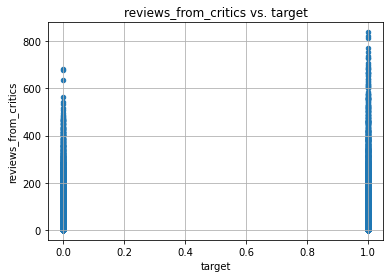

In [32]:
print(pd.concat([full_dataset['reviews_from_critics'], full_dataset['target']], axis=1).plot.scatter(x='target', y='reviews_from_critics', title='reviews_from_critics vs. target', grid=True))

full_dataset['reviews_from_critics'] = full_dataset['reviews_from_critics'].fillna(0)

### RECAP & PIPELINE

AxesSubplot(0.125,0.125;0.775x0.755)
num_cols: ['year', 'duration', 'language', 'director', 'production_company', 'actors', 'votes', 'reviews_from_users', 'reviews_from_critics']
cat_cols: ['genre', 'country']


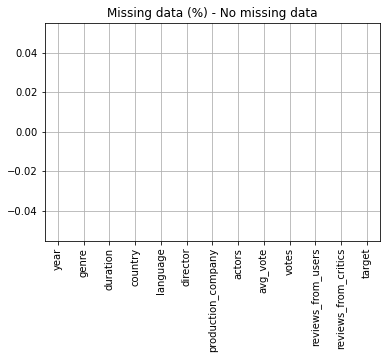

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

#Missing values -> No missing values anymore
print((full_dataset.isna().sum() / num_rows).plot(kind="bar", title="Missing data (%) - No missing data", grid=True))

#Drop avg_vote, because it is the target
full_dataset.drop(['avg_vote'], axis=1, inplace=True)

#Num_cols
num_cols = full_dataset.select_dtypes(exclude="object").columns.to_list()
num_cols.remove("target")
print(f"num_cols: {num_cols}")

#Cat_cols
cat_cols = full_dataset.select_dtypes("object").columns.to_list()
print(f"cat_cols: {cat_cols}")

#Columntransformer
num_pipe = make_pipeline(
    SimpleImputer(missing_values=np.nan,strategy='constant'),
    StandardScaler()
    )

cat_pipe = make_pipeline(
    SimpleImputer(missing_values=np.nan,strategy='constant'),
    OneHotEncoder(handle_unknown="ignore")
    )

column_transformer = ColumnTransformer([
 ('num', num_pipe, num_cols),
 ('cat', cat_pipe, cat_cols)    
 ],
 remainder='passthrough'
)

### Part 3.

Train and compare the models

3.1. Select models, you are going to train, select hyperparameters that have to be tunes.

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

train, test = train_test_split(full_dataset, test_size=0.2, random_state=42)
X_train, y_train, X_test, y_test = train.drop(['target'], axis=1), train.target, test.drop(['target'], axis=1), test.target

param_grid = [
    {'cf' : [BaggingClassifier()],  
            'cf__n_estimators': [5, 10],
            'cf__max_samples': [5, 10],
            'cf__n_jobs': [10, 50]
    },
    {'cf' : [RandomForestClassifier()],
         'cf__n_estimators': [100, 1000],
         'cf__criterion': ['entropy', 'gini'], 
         'cf__max_depth': [100,500,1000],
    },
    {'cf' : [GradientBoostingClassifier()],
         'cf__n_estimators': [100,150,200],
         'cf__learning_rate': [0.1,0.15,0.2],
         'cf__max_depth': [3,4,5]
    }
]


3.2 Use cross-validation to compare models and select best set of hyperparameters

#### F1_Score:
- The GradientBoostingClassifier won the compeition in param_grid. The best parameters were {'max_depth': 5, 'n_estimators': 200}
- F-1 Score: 0.90 (compared to 0.45 in ones dataset). I estimate this value as quite high and good.
- There was not much difference in the F-1 Score between training and test data set, even quite identical (R1-Score: 0.8971 vs. 0.9002)

In [35]:
pipe = Pipeline([
    ('ct', column_transformer),
    ('cf' , RandomForestClassifier())
])

In [36]:
grid_pipe = GridSearchCV(pipe, param_grid = param_grid, cv=3, scoring='f1',n_jobs=-1)
grid_pipe.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'duration',
                                                                          'language',
                                                                 

In [37]:
print(grid_pipe.best_score_)
print(f1_score(y_test, grid_pipe.predict(X_test)))

print(grid_pipe.best_estimator_.steps[1][1])

0.8970738000835361
0.9002326934264108
GradientBoostingClassifier(max_depth=5, n_estimators=200)


In [38]:
print(grid_pipe.best_estimator_.steps[1][1])

GradientBoostingClassifier(max_depth=5, n_estimators=200)


In [39]:
# ones
print(f1_score(y_test, np.ones(y_test.size)))

0.44815363794547913


3.3 Which model and setup is the best? How does it perform on the test dataset? If you were to present this model to the client, how would you describe it?

#### Conclusion:
- Unfortunately it was very hard to find a good measure of success. Finally I decided >0.75 (Top 25% is a success) quantile of average_votes seems to be a good target.
- On the other side, we consider the quality of the movies (high rating) and it has a diret correlation with the number of votes, even if not perfect.
- Finally the number of votes are a strong indicator of financial success. But because we lack the control variable of revenue (too many missing values), it is hard to determine
a good Threshold of success. Therefore average_votes was the right measure.
- I consider the high predictability of 90% a veray good ML-model to predict success of a movie.
